# Author : BADAR IFTIKHAR
### LETSGROWMORE  
### LGM VIP JANUARY-2022
### INTERMEDIATE LEVEL TASK 2
### TASK 1 PROJECT :
### Exploratory Data Analysis-Terrorism

# Exploratory Data Analysis-Terrorism

### Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Importing Dataset

In [ ]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding = 'latin1')

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


### Analysing the data

In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data.rename(columns = {'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
            'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
            'nwound':'Wound'}, inplace = True) #correcting

In [ ]:
data.head()

,eventid,Year,Month,day,approxdate,extended,resolution,country,Country,region,Region,State,City,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attacktype,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Targettype,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,kill,nkillus,nkillter,Wound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.shape

(134329, 135)

In [ ]:
data.info() #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134329 entries, 0 to 134328
Columns: 135 entries, eventid to related
dtypes: float64(61), int64(16), object(58)
memory usage: 138.4+ MB


In [ ]:
data.isna().sum() #checking missing values

eventid            0
Year               0
Month              0
day                0
approxdate    132414
               ...  
INT_LOG            1
INT_IDEO           1
INT_MISC           1
INT_ANY            1
related       117719
Length: 135, dtype: int64

In [ ]:
data.nunique() #nunique() provides the feature to exclude the NaN values from the count of unique numbers

eventid       134329
Year              44
Month             13
day               32
approxdate       846
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        11514
Length: 135, dtype: int64

In [ ]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [ ]:
data['Casualities'] = data['kill'] + data['Wound']

In [ ]:
data.head()

,eventid,Year,Month,day,approxdate,extended,resolution,country,Country,region,Region,State,City,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attacktype,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Targettype,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4_txt,weapdetail,kill,nkillus,nkillter,Wound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN,0.0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN,0.0


In [ ]:
data.describe()

,eventid,Year,Month,day,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,kill,nkillus,nkillter,Wound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
count,1.343290e+05,134329.000000,134329.000000,134329.000000,134329.000000,134329.000000,134329.000000,130041.000000,1.300400e+05,134323.000000,134329.000000,134329.000000,134329.000000,134329.000000,134328.000000,19941.000000,134328.000000,134329.000000,134329.000000,134329.000000,3853.000000,223.000000,134329.000000,127810.000000,133406.000000,6979.000000,6550.000000,6674.000000,765.000000,695.000000,737.000000,133949.000000,776.000000,99.000000,134329.000000,63214.000000,64840.000000,68209.000000,9300.000000,711.000000,292.000000,97.000000,58.000000,4515.000000,134328.000000,118784.000000,8387.000000,7512.000000,1113.000000,1010.000000,73.000000,70.000000,134329.000000,69890.000000,68415.000000,134329.000000,69638.000000,67053.000000,134328.000000,48516.000000,2.344000e+04,134150.000000,9154.000000,9099.000000,2685.000000,5084.000000,72963.000000,1.098000e+03,3.120000e+02,5.230000e+02,301.000000,6573.000000,5981.000000,134328.000000,134328.000000,134328.000000,134328.000000,134329.000000
mean,1.998141e+11,1998.076179,6.339904,15.396891,0.036679,134.494182,6.738493,22.539541,-6.430552e+02,1.437900,0.066359,0.987672,0.992578,0.891289,-0.775155,1.290908,0.123608,0.910816,0.026249,3.137349,3.434726,4.636771,8.175301,46.394241,127.583534,9.729331,52.735573,133.270752,9.389542,53.201439,134.264586,0.098366,0.328608,0.363636,0.002189,-55.438953,-2.308436,-0.059274,7.053763,0.202532,7.486301,0.577320,7.448276,-6.803101,6.376206,10.914273,6.566114,10.597577,6.743935,11.178218,6.246575,10.842857,2.155179,0.073315,0.301893,2.945380,0.059536,0.045874,-0.266869,3.320142,3.331756e+05,0.060388,4.181778,-0.498406,-27.616387,-20.873721,-0.143004,3.299443e+06,1.043839e+06,5.228487e+05,407.604651,4.471778,-23.976258,-4.642517,-4.591842,0.100694,-3.984262,5.100559
std,1.255120e+09,12.552582,3.382599,8.824650,0.187972,117.103777,3.009279,19.999607,2.390000e+05,1.027208,0.292244,0.110345,0.085831,0.311277,2.803452,0.613761,0.329135,0.285010,0.159875,1.844613,2.113156,2.227569,6.647774,31.514620,86.855955,5.823620,25.933475,128.055024,5.879007,26.879060,141.758422,0.297810,0.470010,0.483494,0.046732,281.640464,15.686675,1.371913,2.934770,1.479834,3.224128,0.496552,3.424230,3.920453,2.099322,6.675155,1.946521,7.505241,2.048429,8.154840,1.507212,8.192672,11.298662,7.356351,3.293425,39.165073,3.952507,1.017819,2.852395,0.505062,1.999534e+07,0.367745,234.109618,8.130346,92.843452,138.838253,1.187650,3.228244e+07,9.489030e+06,2.825186e+06,3936.006869,2.062181,59.678042,4.543548,4.609869,0.645638,4.688049,45.801786
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9

### Data Visualisation

### Attacking Year

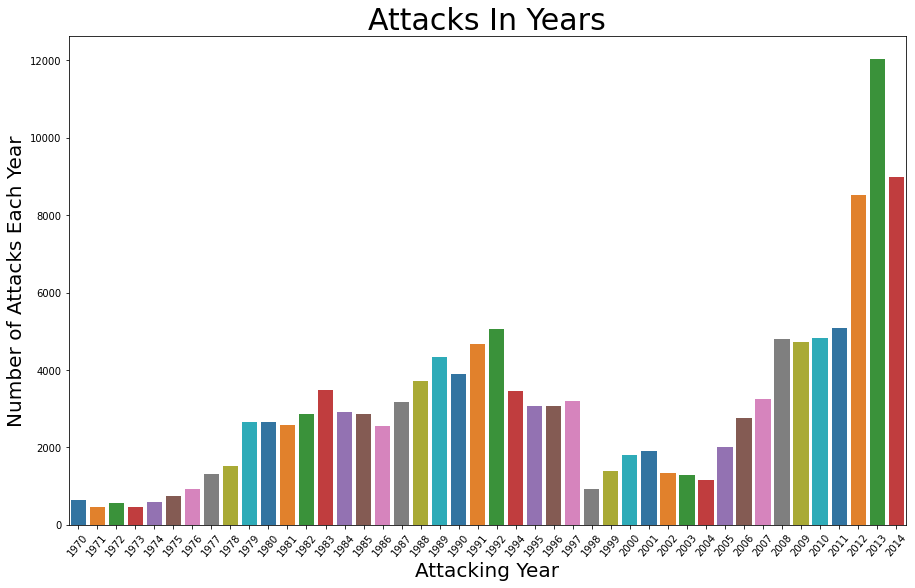

In [ ]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,9))
sb.barplot(x = year, y = years_count, palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year', fontsize = 20)
plt.ylabel('Number of Attacks Each Year', fontsize = 20)
plt.title('Attacks In Years', fontsize = 30)
plt.show()

### Terrorist Activities By Region

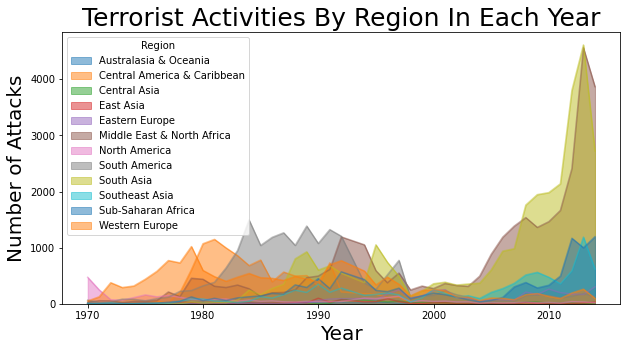

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind = 'area', stacked = False, figsize = (10,5))
plt.title('Terrorist Activities By Region In Each Year', fontsize = 25)
plt.ylabel('Number of Attacks', fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.show()

### List Country with the attacks

In [ ]:
attack = data.Country.value_counts()[:10]
print(attack)

Iraq              14585
Pakistan          10599
India              8709
Colombia           7821
Afghanistan        6869
Peru               6070
El Salvador        5320
United Kingdom     4842
Philippines        4548
Spain              3237
Name: Country, dtype: int64


### List Group with the attacks 

In [ ]:
data.Group.value_counts()[1:10]

Shining Path (SL)                                   4539
Taliban                                             3734
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2307
Basque Fatherland and Freedom (ETA)                 2024
New People's Army (NPA)                             1760
Liberation Tigers of Tamil Eelam (LTTE)             1606
Communist Party of India - Maoist (CPI-Maoist)      1556
Name: Group, dtype: int64

### Plot the data with top countries affected

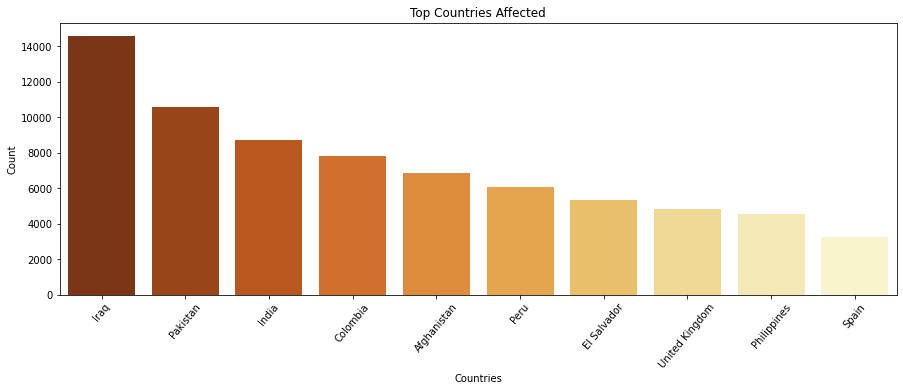

In [ ]:
plt.subplots(figsize = (15,5))
sb.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette = 'YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

### Plot the data with the people died due to attack

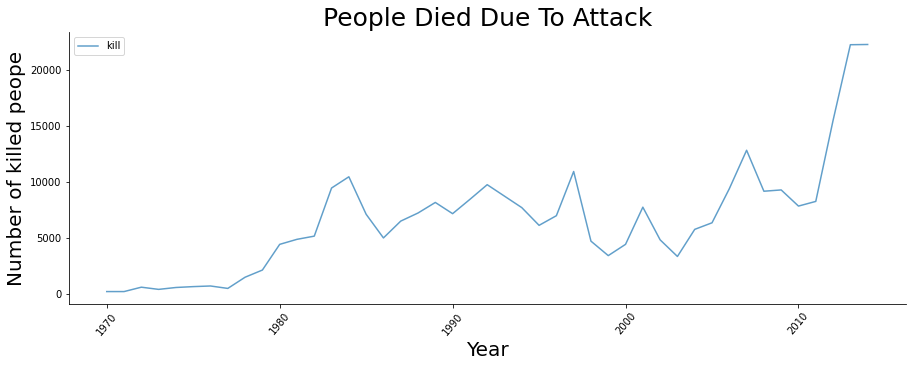

In [ ]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(15,5))
df.plot(kind='line', alpha = 0.7, ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack", fontsize=25)
plt.ylabel("Number of killed peope", fontsize=20)
plt.xlabel('Year', fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

### List City affected by the attack 

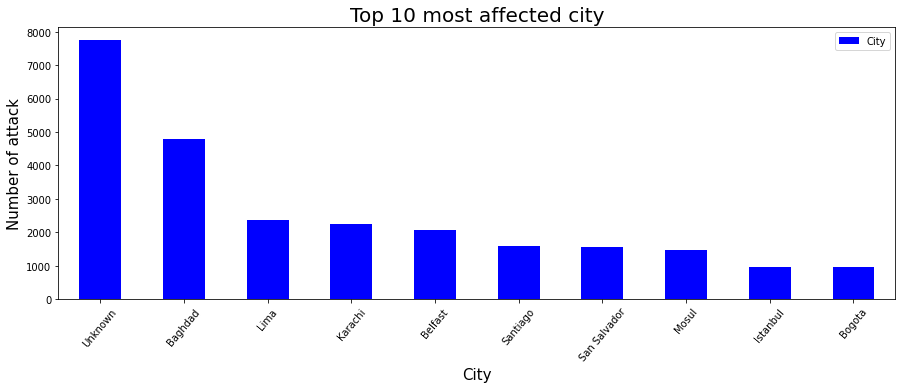

In [ ]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(15,5), color = 'blue')
plt.xticks(rotation = 50)
plt.xlabel("City", fontsize = 15)
plt.ylabel("Number of attack", fontsize = 15)
plt.title("Top 10 most affected city", fontsize = 20)
plt.show()

### Number of attack & Name of attacktype

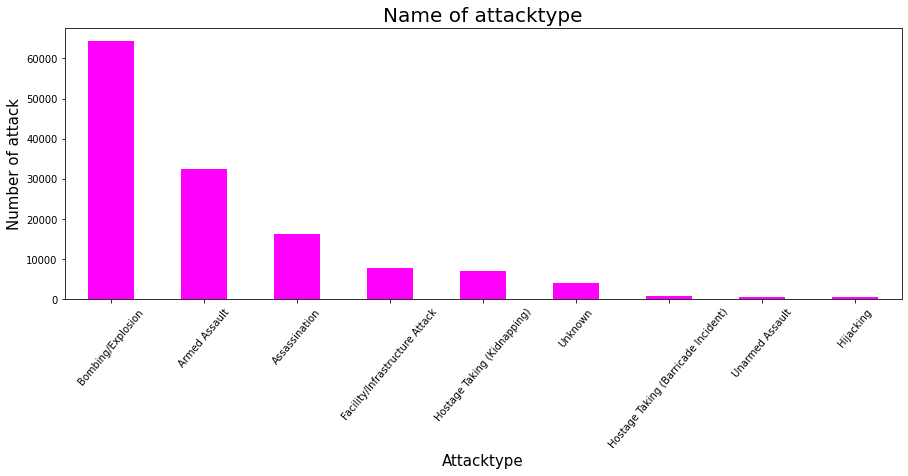

In [ ]:
data['Attacktype'].value_counts().plot(kind = 'bar', figsize = (15,5), color = 'magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype", fontsize = 15)
plt.ylabel("Number of attack", fontsize = 15)
plt.title("Name of attacktype", fontsize = 20)
plt.show()

### Kill count & Number of people & Attack type

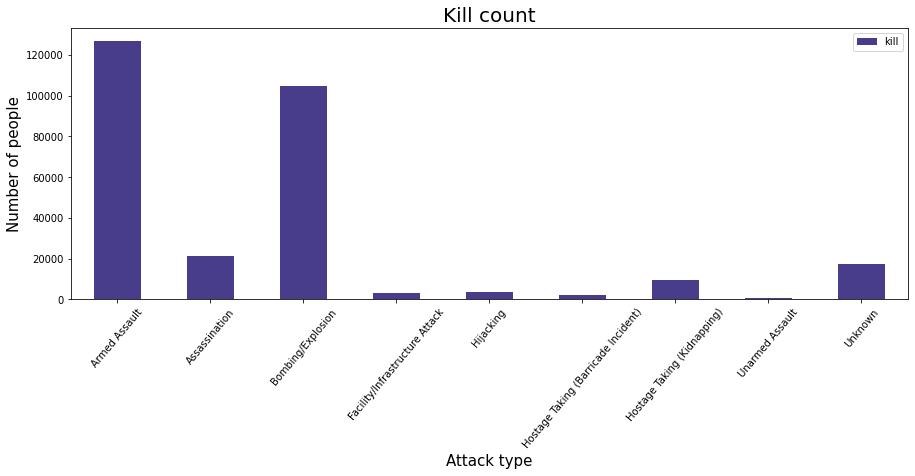

In [ ]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind ='bar',figsize=(15,5),color=['darkslateblue'])
plt.xticks(rotation = 50)
plt.title("Kill count", fontsize = 20)
plt.ylabel('Number of people', fontsize = 15)
plt.xlabel('Attack type', fontsize = 15)
plt.show()

### Number of wounded & Number of people & Attack type

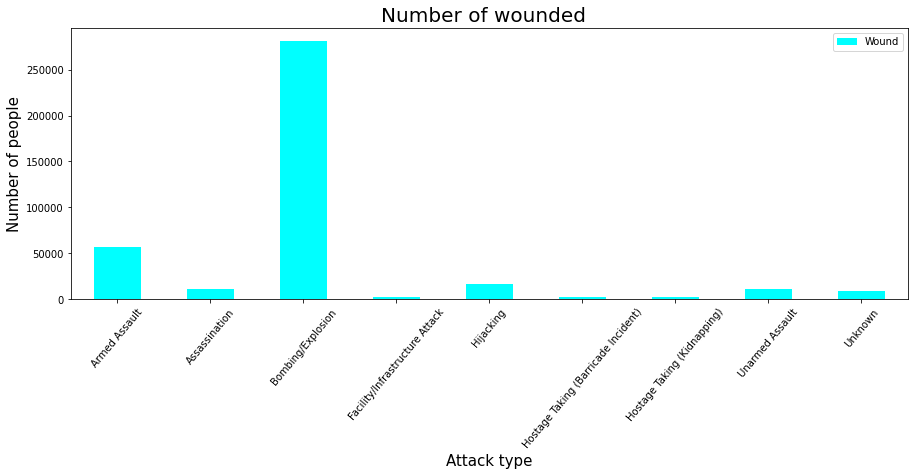

In [ ]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(15,5),color=['cyan'])
plt.xticks(rotation = 50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

### Attack per year & Count & Attacktype

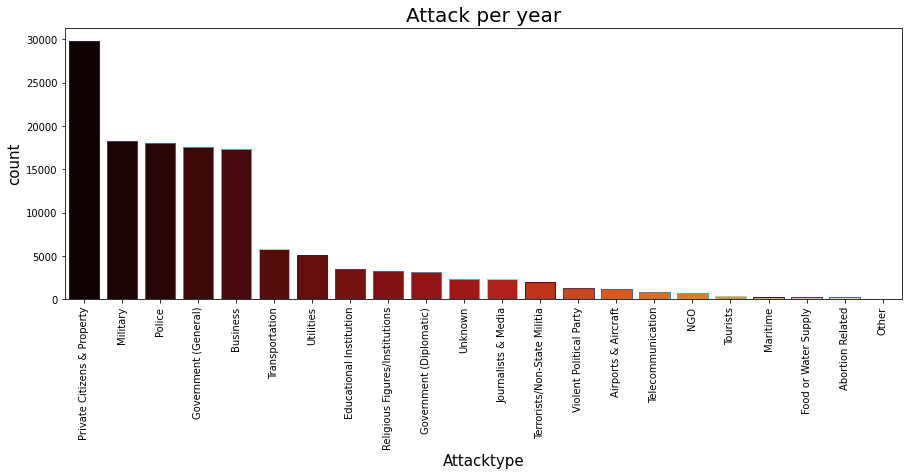

In [ ]:
plt.subplots(figsize=(15,5))
sb.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor = sb.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

### List Terrorist Group attack

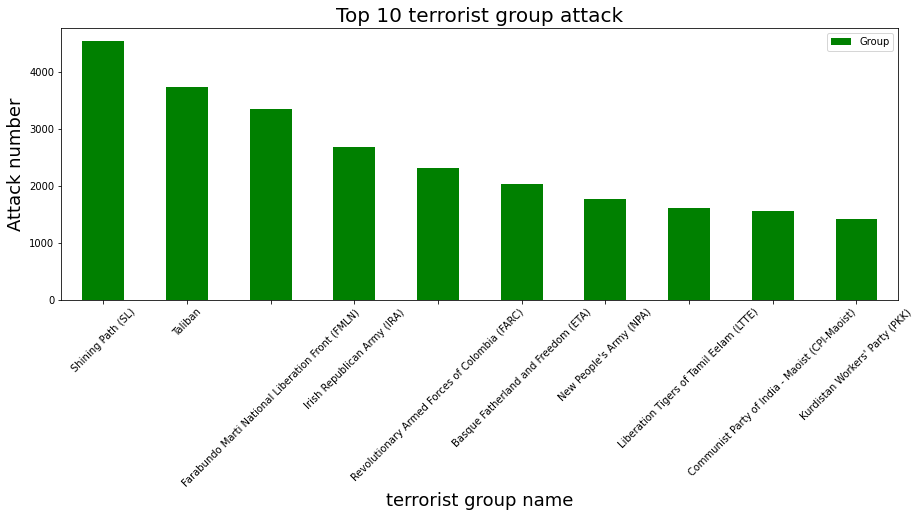

In [ ]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(15,5))
plt.xticks(rotation = 45)
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=18)
plt.ylabel("Attack number",fontsize=18)
plt.show()

### List Terrorist Group Name

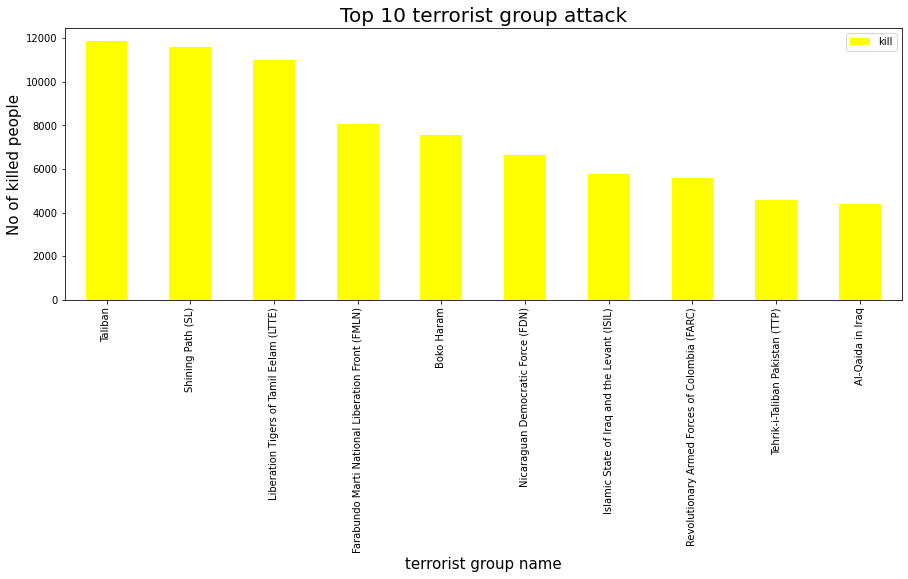

In [ ]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='yellow',figsize=(15,5))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel("terrorist group name",fontsize = 15)
plt.ylabel("No of killed people",fontsize = 15)
plt.show()

### List out Terrorist Group Name

In [ ]:
df = data[['Group','Country','kill']]
df = df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)

In [ ]:
df

,Group,Country,kill
0,Taliban,Afghanistan,11745.0
1,Shining Path (SL),Peru,11575.0
2,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
3,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
4,Boko Haram,Nigeria,7548.0
5,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
6,Revolutionary Armed Forces of Colombia (FARC),Colombia,5551.0
7,Islamic State of Iraq and the Levant (ISIL),Iraq,5452.0
8,Tehrik-i-Taliban Pakistan (TTP),Pakistan,4561.0
9,Al-Qaida in Iraq,Iraq,4273.0


### Number of people killed by terror attack

In [ ]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 289503


In [ ]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')

In [ ]:
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,126933.0,21484.0,104842.0,3048.0,3603.0,2326.0,9389.0,727.0,17151.0


### Number of country killed by terror attack

In [ ]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')

In [ ]:
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,17864.0,41.0,11009.0,0.0,3036.0,0.0,490.0,31.0,13.0,28.0,252.0,1.0,29.0,1049.0,76.0,14.0,41.0,3.0,0.0,9.0,42.0,75.0,11.0,199.0,0.0,28.0,3.0,3884.0,543.0,145.0,354.0,797.0,723.0,225.0,665.0,14394.0,1.0,17.0,248.0,8.0,...,96.0,1267.0,15526.0,0.0,2.0,3249.0,29.0,6.0,13.0,74.0,4441.0,60.0,292.0,49.0,2370.0,76.0,6.0,145.0,5145.0,3.0,2881.0,376.0,122.0,3358.0,3548.0,5.0,68.0,0.0,0.0,212.0,1.0,0.0,1188.0,97.0,1.0,3373.0,119.0,324.0,70.0,154.0


# Conclusion and Results :
1. Country with the most attacks: Iraq
2. City with the most attacks: Baghdad
3. Region with the most attacks: Middle East & North Africa
4. Year with the most attacks: 2014
5. Month with the most attacks: 5
6. Group with the most attacks: Taliban

7. Most Attack Types: Bombing/Explosion